In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
from datetime import timedelta
from datetime import datetime
import tensorflow as tf
%matplotlib inline
%config IPCompleter.greedy=True
data = pd.read_csv("Indigo_clean.csv")
del(data['Unnamed: 0'])

# 'Search_Date', 'Departure_Date', 'Days_fly', 'destination', 'deptime',
     #  'arrtime', 'Total_fare', 'seats_avail', 'duration', 'stops', 'Day_Name',
      # 'd_month', 's_month', 'diff_month', 'search_day', 'Fare_cat'
data.rename(columns={'Days_fly':'Days_Fly', 'destination':'Destination', 'deptime':'Dept_Time',
       'arrtime':'Arr_Time', 'Total_fare':'Total_Fare', 'seats_avail':'Seats_Avail', 'duration':'Duration', 'stops':'Stops',
       'd_month':'Dept_Month', 's_month':'Search_Month', 'diff_month':'Diff_Month', 'search_day':'Search_Day', 'Fare_cat':'Fare_Cat'},inplace = True)

plt.style.use("fivethirtyeight")

pnq_data = data.loc[data['Destination'] == 4]
bom_data = data.loc[data['Destination'] == 1]
hyd_data = data.loc[data['Destination'] == 2]
nag_data = data.loc[data['Destination'] == 3]

data = data.loc[data['Stops']<2]

data.head()

,Search_Date,Departure_Date,Days_Fly,Destination,Dept_Time,Arr_Time,Total_Fare,Seats_Avail,Duration,Stops,Day_Name,Dept_Month,Search_Month,Diff_Month,Search_Day,Fare_Cat
0,2019-08-07,2019-08-07,0,4,3,3,5045,17,125,0,2,8,8,0,7,3
1,2019-08-07,2019-08-08,1,4,3,3,5844,5,125,0,3,8,8,0,7,3
2,2019-08-07,2019-08-09,2,4,3,3,6144,1,125,0,4,8,8,0,7,4
3,2019-08-07,2019-08-11,4,4,3,3,6564,1,125,0,6,8,8,0,7,4
4,2019-08-07,2019-08-12,5,4,3,3,4306,2,125,0,0,8,8,0,7,2


In [2]:
def plot_by_mean(grp,title,size):
    plt.figure(figsize = (15,5))
    data.groupby(data[grp])['Total_Fare'].mean().plot()
    bom_data.groupby(bom_data[grp])['Total_Fare'].mean().plot()
    hyd_data.groupby(hyd_data[grp])['Total_Fare'].mean().plot()
    nag_data.groupby(nag_data[grp])['Total_Fare'].mean().plot()
    pnq_data.groupby(pnq_data[grp])['Total_Fare'].mean().plot()
    plt.legend(['Overall','Mumbai','Hyderabad','Nagpur','Pune'])
    plt.title(f"{title} vs Cost")
    plt.xticks([x for x in range(size)],fontsize = 10)
    plt.show()

def plot_by_min(grp,title,size):
    plt.figure(figsize = (15,5))
    bom_data.groupby(bom_data[grp])['Total_Fare'].min().plot()
    hyd_data.groupby(hyd_data[grp])['Total_Fare'].min().plot()
    nag_data.groupby(nag_data[grp])['Total_Fare'].min().plot()
    pnq_data.groupby(pnq_data[grp])['Total_Fare'].min().plot()
    plt.legend(['Mumbai','Hyderabad','Nagpur','Pune'])
    plt.title(f"{title} vs Cost")
    plt.xticks([x for x in range(size)],fontsize = 10)
    plt.show()

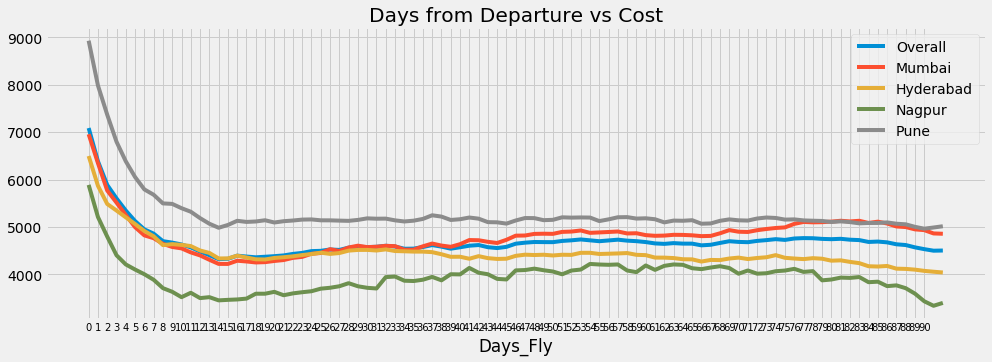

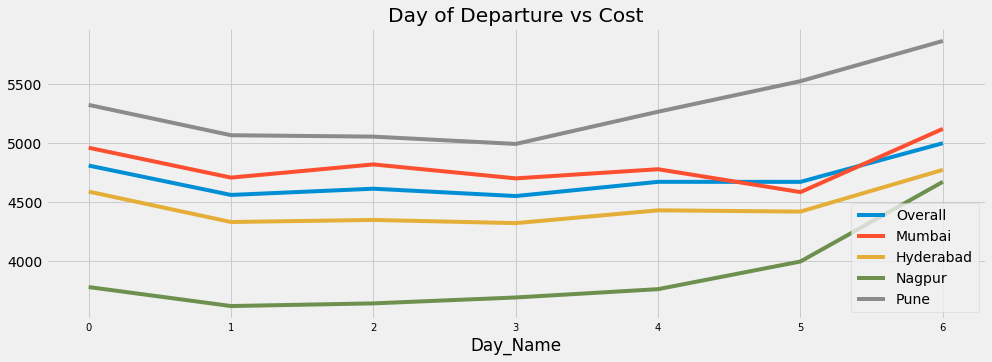

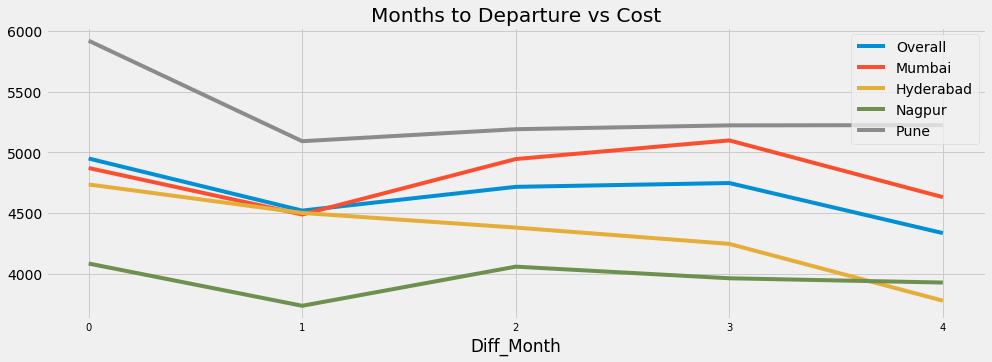

In [24]:
plot_by_mean('Days_Fly','Days from Departure',91)
plot_by_mean('Day_Name','Day of Departure',7)
plot_by_mean('Diff_Month','Months to Departure',5)

# Observations from the above three charts:
<ul>
    <li>Lowest Price for Flight ticket is always for Nagpur in the given destination and hightest for Pune(why?)</li>
    <li>10-25 days is the ideal time to buy tickets</li>
    <li>Tuesday has the lowest avg price out of all the days. Prices are generally lower in the mid week(Tues to Thursday) and highest on Sunday-Monday.</li>
    <li>Either buy tickets 70-90 days before or 10 to 30 days before</li>
</ul>

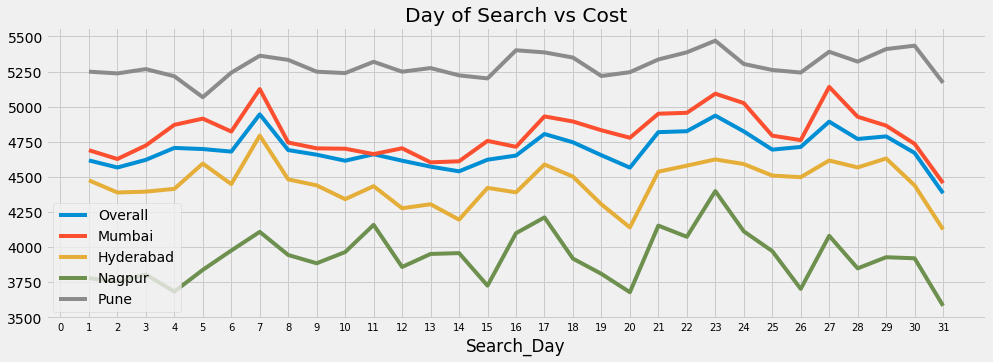

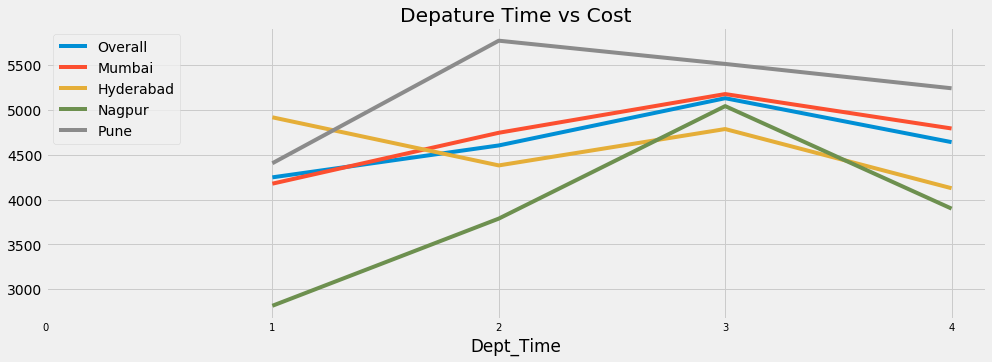

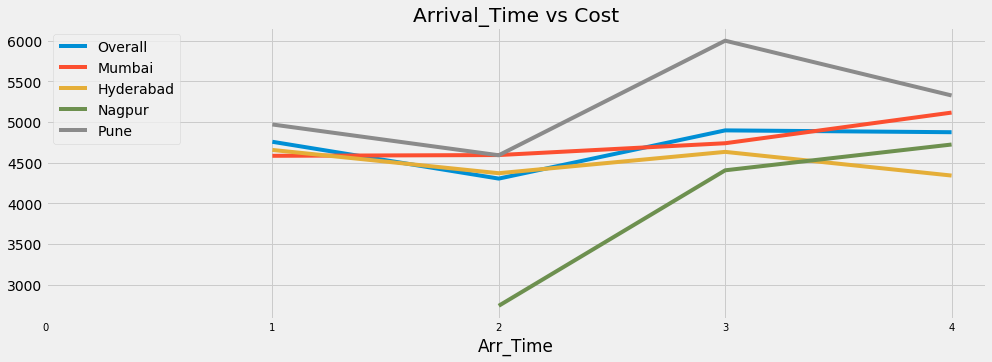

In [3]:
plot_by_mean('Search_Day','Day of Search',32)
plot_by_mean('Dept_Time','Depature Time',5)
plot_by_mean('Arr_Time','Arrival_Time',5)

# Observations from the above three charts:
<ul>
    <li>Certain dates like 7th , 17th , 23rd have sudden rise, while dates like 15th,20th and 26th have sharp fall in prices</li>
    <li>Cost of ticket is highest in the 12 noon to 6pm slot (except for Pune where it is the 6am to 12 noon slot)</li>
    <li>Late night flights and early morning flight are cheaper</li>
    <li>For flights arriving in the slot 12 noon to 6pm ,Pune has an expceptional price rise.</li>
</ul>

# These were the observation for Mean prices, Now lets see minimum price

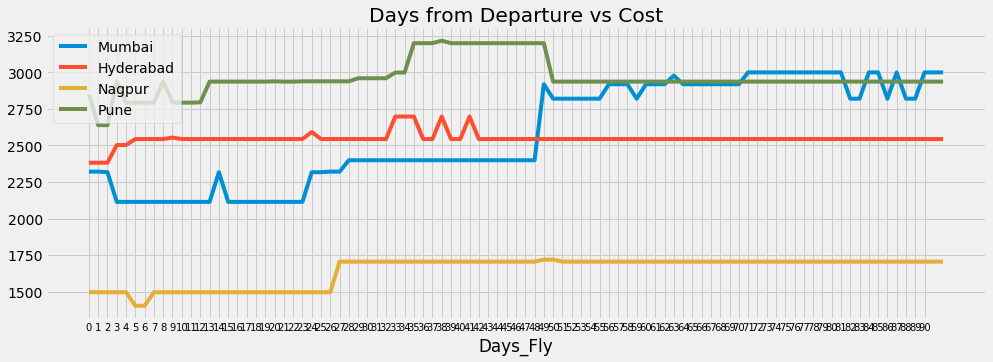

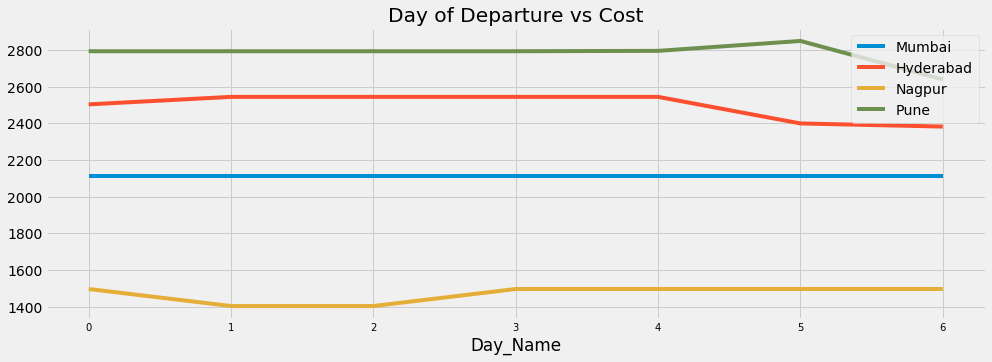

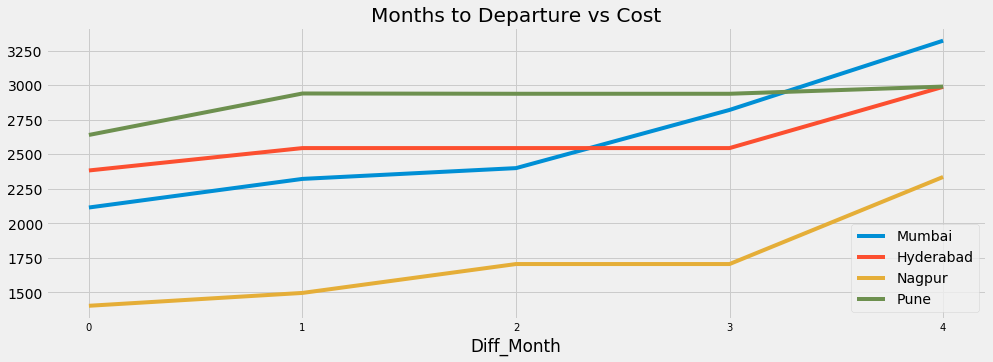

In [4]:
plot_by_min('Days_Fly','Days from Departure',91)
plot_by_min('Day_Name','Day of Departure',7)
plot_by_min('Diff_Month','Months to Departure',5)

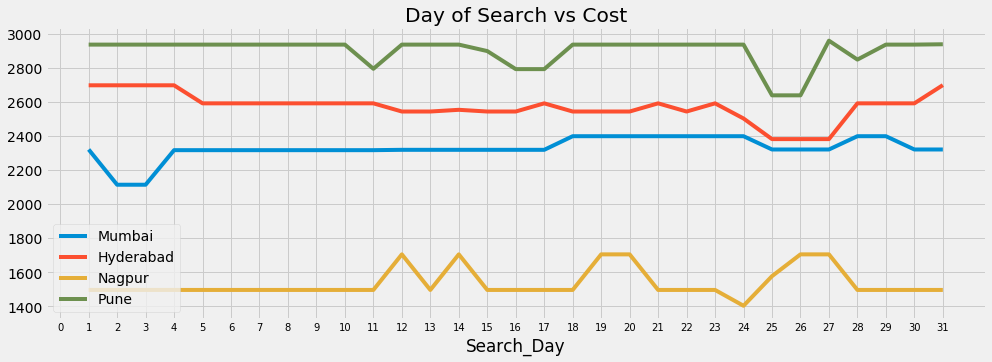

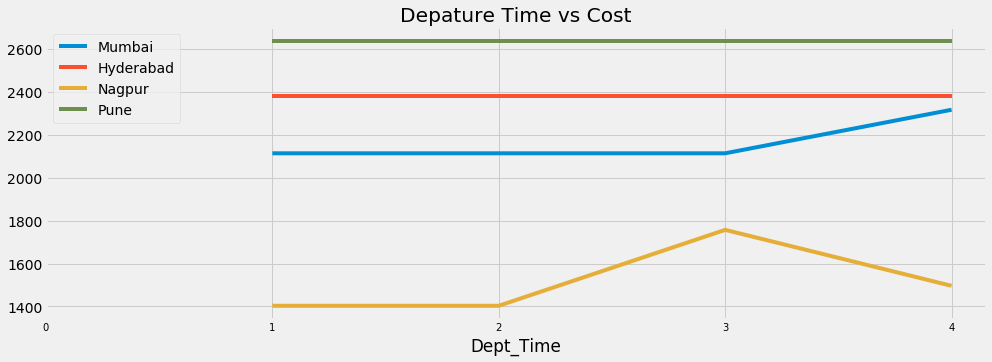

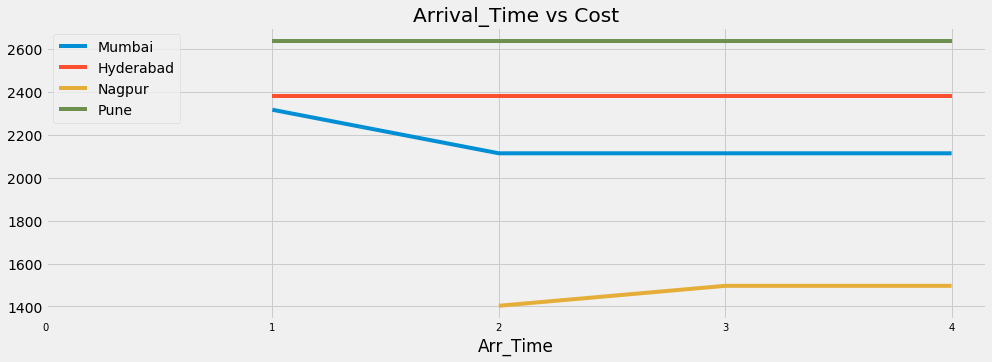

In [32]:
plot_by_min('Search_Day','Day of Search',32)
plot_by_min('Dept_Time','Depature Time',5)
plot_by_min('Arr_Time','Arrival_Time',5)

# Observation from above 6 plots
<ul>
    <li></li>
    <li></li>
    <li></li>
    <li></li>
</ul>

In [13]:
plt.figure(figsize = (15,7))
data.groupby(['Departure_Date','Destination'])["Total_Fare"].mean()

Departure_Date  Destination
2019-08-07      1              4162.954545
                2              4557.500000
                3              3663.400000
                4              5583.727273
2019-08-08      1              5412.953488
                                  ...     
2020-03-13      4              4032.857143
2020-03-14      1              3718.222222
                2              2994.083333
                3              3489.200000
                4              4910.833333
Name: Total_Fare, Length: 884, dtype: float64

<Figure size 1080x504 with 0 Axes>